In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv('/home/roman/work/data/stops/data.tsv', sep='\t', names=['datetime', 'id', 'type', 'route_id', 'lat', 'lon'])

print(data_df.shape)

(1064095, 6)


In [3]:
data_df['datetime'] = pd.to_datetime(data_df['datetime'])


In [4]:
data_df.head()

,datetime,id,type,route_id,lat,lon
0,2015-05-12 14:24:33,3982,tramway,1,50.700576,51.212909
1,2015-05-12 14:25:13,3982,tramway,1,50.702068,51.212772
2,2015-05-12 14:25:53,3982,tramway,1,50.702930,51.212703
3,2015-05-12 14:26:33,3982,tramway,1,50.705974,51.212421
4,2015-05-12 14:27:13,3982,tramway,1,50.706775,51.212428


In [5]:
data_df.count()

datetime    1064095
id          1064095
type        1064095
route_id    1064095
lat         1064095
lon         1064095
dtype: int64

In [6]:
data_df.dtypes

datetime    datetime64[ns]
id                   int64
type                object
route_id             int64
lat                float64
lon                float64
dtype: object

In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1064095.0,4291.581742,2982.796960,759.000000,1501.000000,3475.000000,7136.000000,10319.000000
route_id,1064095.0,63.941277,48.076470,1.000000,29.000000,53.000000,89.000000,224.000000
lat,1064095.0,50.606622,0.084658,50.296417,50.544712,50.611568,50.676059,51.046154
lon,1064095.0,51.106284,0.143798,50.145202,51.053720,51.128475,51.189899,52.058666


отобразим все координаты на плоскость

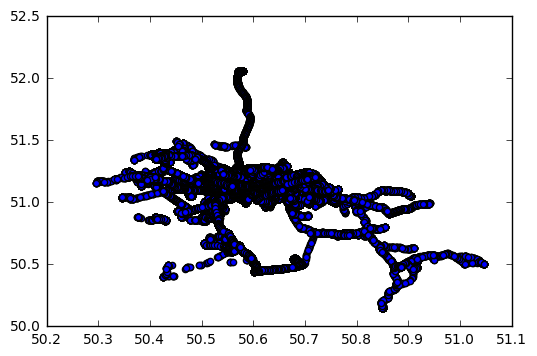

In [8]:
plt.scatter(data_df['lat'],data_df['lon'])

Определим есть ли пересечение в маршрутах для различного типа транспорта, вообще логично если есть

In [9]:
data_df['type'].unique()

array(['tramway', 'bus', 'trolleybus'], dtype=object)

In [10]:
print('tramway : ',np.unique(data_df[data_df['type']=='tramway']['route_id']))
print('bus : ',np.unique(data_df[data_df['type']=='bus']['route_id']))
print('trolleybus : ',np.unique(data_df[data_df['type']=='trolleybus']['route_id']))

tramway :  [  1   2   3   5  11  14  15  16  17  18  19  21  22  23  24  25  27  28
  29  30  31  32  33  39  41  45  48  49  51  54  70  71  72  75  76  77
  78  79 103]
bus :  [  3   4   5   6   7   8   9  10  11  12  13  14  15  18  22  23  24  25
  26  27  28  30  31  32  34  35  36  37  38  39  40  42  43  45  46  47
  48  50  52  53  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  71  72  73  74  76  77  79  80  81  82  83  84  85  86  87  89  90
  91  92  93  94  95  97  98  99 100 102 103 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 152 153 155 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224]
trolleybus : 

In [8]:
tram_routes = np.unique(data_df[data_df['type']=='tramway']['route_id'])
bus_routes = np.unique(data_df[data_df['type']=='bus']['route_id'])
trol_routes = np.unique(data_df[data_df['type']=='trolleybus']['route_id'])

print('count of routes tramway = %d| count of routes bus = %d| count of routes trolleybus = %d'%(tram_routes.shape[0],bus_routes.shape[0],trol_routes.shape[0]))

count of routes tramway = 39| count of routes bus = 199| count of routes trolleybus = 43


In [9]:
data_bus = data_df[(data_df['type']=='bus')&(data_df['route_id']==bus_routes[1])]

In [10]:
data_bus.shape

(19221, 6)

In [46]:
bus_routes[1]

4

In [11]:
data_bus['id'].unique()

array([4002, 1036, 1047, 5597, 5642, 5862, 6027, 6037, 6038, 6398, 6839,
       1363, 1448, 6980, 3465, 7048, 7132, 9159,  998,  894,  895])

наверное популярный маршрут много автобусов ходят

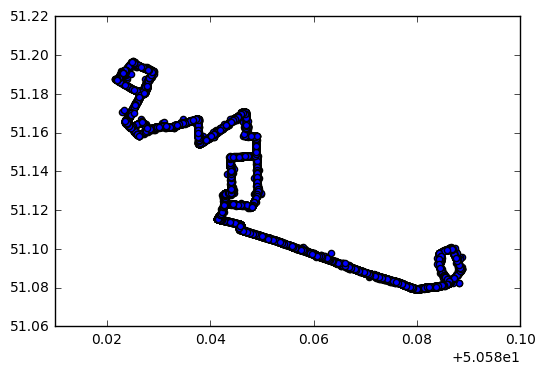

In [15]:
plt.scatter(data_bus['lat'],data_bus['lon'])

In [12]:
uniq_time = data_df['datetime'].unique()

In [13]:
uniq_time.shape

(4039,)

In [14]:
print(min(uniq_time))
print(max(uniq_time))
print(max(uniq_time)-min(uniq_time))

2015-05-12T00:45:20.000000000
2015-05-12T23:54:34.000000000
83354000000000 nanoseconds


In [15]:
tm = max(uniq_time)-min(uniq_time)

In [16]:
np.timedelta64(tm,'ns')

numpy.timedelta64(83354000000000,'ns')

In [17]:
tm

numpy.timedelta64(83354000000000,'ns')

In [47]:
np.timedelta64(tm,'h')

numpy.timedelta64(23,'h')

Практически суточные данные

In [19]:
print(uniq_time[0])
print(uniq_time[1])

2015-05-12T14:24:33.000000000
2015-05-12T14:25:13.000000000


In [20]:
data_bus.head()

,datetime,id,type,route_id,lat,lon
1786,2015-05-12 06:46:15,4002,bus,4,50.603019,51.190580
1787,2015-05-12 06:49:15,4002,bus,4,50.602962,51.190408
1788,2015-05-12 07:02:36,4002,bus,4,50.602390,51.188697
1789,2015-05-12 07:02:56,4002,bus,4,50.602215,51.188171
1790,2015-05-12 07:03:16,4002,bus,4,50.601902,51.187228


In [21]:
bs_uq = data_bus['id'].unique()

In [22]:
tm_bs1 = data_bus[data_bus['id']==bs_uq[0]]

In [23]:
tm_bs1['datetime'].shape

(1095,)

In [24]:
tm_bs1['datetime'].unique().shape

(1095,)

In [25]:
dtm = np.sort(tm_bs1['datetime'])

In [26]:
print(dtm[0])
print(dtm[1])

2015-05-12T06:46:15.000000000
2015-05-12T06:49:15.000000000


In [27]:
np.timedelta64(dtm[4]-dtm[3],'s')

numpy.timedelta64(20,'s')

In [38]:
tm_bs1 = data_bus[data_bus['id']==bs_uq[1]]
dtm = np.sort(tm_bs1['datetime'])

for ind in np.arange(1,dtm.shape[0]):
    print(np.timedelta64(dtm[ind]-dtm[ind-1],'s'))

80 seconds
60 seconds
60 seconds
60 seconds
140 seconds
60 seconds
60 seconds
60 seconds
60 seconds
60 seconds
80 seconds
60 seconds
60 seconds
121 seconds
60 seconds
140 seconds
60 seconds
60 seconds
60 seconds
80 seconds
60 seconds
60 seconds
80 seconds
60 seconds
80 seconds
40 seconds
200 seconds
60 seconds
81 seconds
60 seconds
60 seconds
60 seconds
80 seconds
60 seconds
120 seconds
60 seconds
60 seconds
80 seconds
60 seconds
60 seconds
60 seconds
120 seconds
901 seconds
120 seconds
60 seconds
80 seconds
120 seconds
60 seconds
181 seconds
79 seconds
40 seconds
61 seconds
140 seconds
60 seconds
60 seconds
60 seconds
60 seconds
120 seconds
80 seconds
60 seconds
80 seconds
120 seconds
61 seconds
60 seconds
80 seconds
40 seconds
320 seconds
120 seconds
160 seconds
60 seconds
140 seconds
60 seconds
60 seconds
80 seconds
60 seconds
60 seconds
81 seconds
60 seconds
60 seconds
59 seconds
60 seconds
81 seconds
60 seconds
60 seconds
80 seconds
60 seconds
60 seconds
60 seconds
60 seconds
60 s

видим что шаг по времени различный
хотя время транзакции тоже странное... вполне возможно что оно как-то с географией связано.. надо проверить.. 
вполне возможно это как-то будет кластеризоваться

In [28]:
tm_uniq = np.sort(data_df['datetime'].unique())

In [29]:
tram_df = data_df[data_df['type']=='tramway']
bus_df = data_df[data_df['type']=='bus']
trol_df = data_df[data_df['type']=='trolleybus']

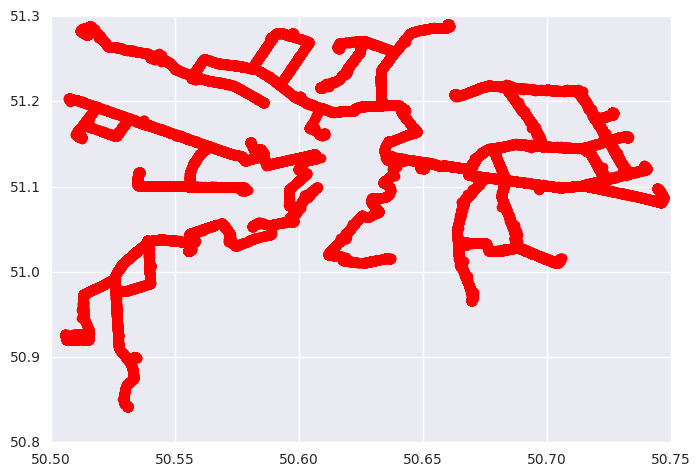

In [49]:
for tm in tm_uniq:
    trmSc = tram_df[tram_df['datetime']==tm]
    plt.plot(trmSc['lat'],trmSc['lon'],'ro')
    #time.sleep(0.05)

In [30]:
import time
import seaborn
from mpl_toolkits.mplot3d import Axes3D

In [31]:
dft = np.array(bus_df['datetime'])

In [65]:
dft.shape

(818823,)

In [32]:
from datetime import datetime

In [33]:
str(bus_df['datetime'][1786])

'2015-05-12 06:46:15'

In [91]:
date_str = str(bus_df['datetime'][1786])
dt_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
print(repr(dt_obj))


datetime.datetime(2015, 5, 12, 6, 46, 15)


In [92]:
dt_obj.timestamp()

1431398775.0

In [35]:
bus_df['datetime'] = bus_df['datetime'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").timestamp())

/home/roman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
bus_df.to_csv('busStops.csv',index=False,sep=',')

In [98]:
bus_df.head()

,datetime,id,type,route_id,lat,lon
1786,1.431399e+09,4002,bus,4,50.603019,51.190580
1787,1.431399e+09,4002,bus,4,50.602962,51.190408
1788,1.431400e+09,4002,bus,4,50.602390,51.188697
1789,1.431400e+09,4002,bus,4,50.602215,51.188171
1790,1.431400e+09,4002,bus,4,50.601902,51.187228


In [36]:
bus_sv1 = bus_df[bus_df['route_id']==4]

In [37]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [39]:
label.fit(bus_sv1['id'].drop_duplicates()) #задаем список значений для кодирования
#bus_sv1['id'] = label.transform(list(label.classes_)) #заменяем значения из списка кодами закодированных элементо

LabelEncoder()

In [41]:
dicts = {}

In [48]:
dicts['id'] = list(label.classes_)

In [43]:
bus_sv1['id'] = label.transform(bus_sv1['id']) 

/home/roman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
bus_sv1.head()

,datetime,id,type,route_id,lat,lon
1786,1.431399e+09,8,bus,4,50.603019,51.190580
1787,1.431399e+09,8,bus,4,50.602962,51.190408
1788,1.431400e+09,8,bus,4,50.602390,51.188697
1789,1.431400e+09,8,bus,4,50.602215,51.188171
1790,1.431400e+09,8,bus,4,50.601902,51.187228


In [45]:
bus_sv1.to_csv('busSv1.csv',index=False,sep=',')